# 1D superconductor without spin-orbit coupling

## Hamiltonian
$$H^{BdG}_{\textbf{k}}(t) = \left[w_0 \left(e^{i ( \tau^z {\textbf k} +\vec{\phi} t) \cdot {\textbf a}}
+e^{-i ( \tau^z {\textbf k} +\vec{\phi} t) \cdot {\textbf a}} \right)-\mu \right]\tau^z\otimes \sigma^0 
- \tau^0 \otimes \vec{ B} \cdot \vec{\sigma} + \Delta \tau^x\otimes \sigma^0
$$

$$
w_k(t=0)=2 w_0 \cos(k) \tau_z\sigma_0
$$
$$
G^f_{k}(t=0,\omega=0)=\left[-(w_{k}( t=0) -B_x\tau_0\sigma_x-B_y\tau_0\sigma_y +\Delta\tau_x\sigma_0)+i \Gamma\tau_0\sigma_0 \right]^{-1}  
$$

$$\rho^f_k(\theta,\omega) = G_k^f(\theta,\omega) \Gamma \tau_0\sigma_0[G_k^f(\theta,\omega)]^\dagger
$$

$$v(k)=-2w_0sin(k)\tau_0\sigma_0$$

$$\sigma=-
\frac{1}{4} \sum_{k=-\pi}^{\pi}\int \frac{d\omega}{2\pi} v(k)\frac{\partial f}{\partial \omega}\rho(0,\omega)^2 v(k)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Superconductor_1D_without_SOC import get_sigma, Rho_k, Fermi_function_derivative, get_sigma_quad

## Zero temperature $\omega=0$

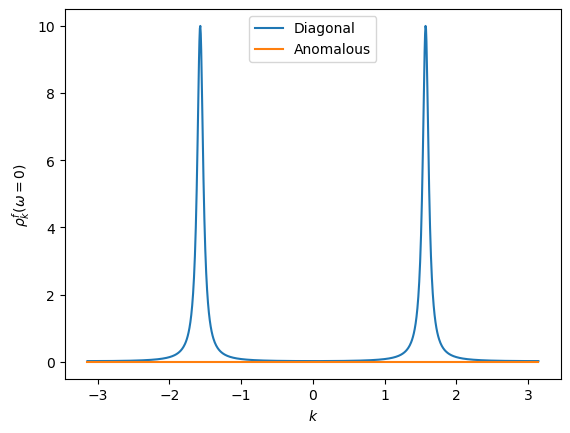

In [5]:
k = np.linspace(-np.pi, np.pi, 1000)
w_0 = 1
Gamma = 0.1
Delta = 0
B_x = 0
B_y = 0
mu = 0
omega = 0

rho_k = np.array([Rho_k(k, omega, w_0, Gamma, B_x, B_y, Delta, mu) for k in k], dtype=complex)
fig, ax  = plt.subplots()
ax.plot(k, rho_k[:, 0, 0], label="Diagonal")
#ax.plot(k, rho_k[:, 1, 1])
ax.plot(k, rho_k[:, 0, 2], label="Anomalous")
#ax.plot(k, rho_k[:, 1, 0])

ax.set_xlabel(r"$k$");
ax.set_ylabel(r"$\rho^f_k(\omega=0)$");
ax.legend();

## Finite temperature $\omega=\Delta$

/home/gabriel/anaconda3/envs/DC-superconductivity/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/gabriel/anaconda3/envs/DC-superconductivity/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


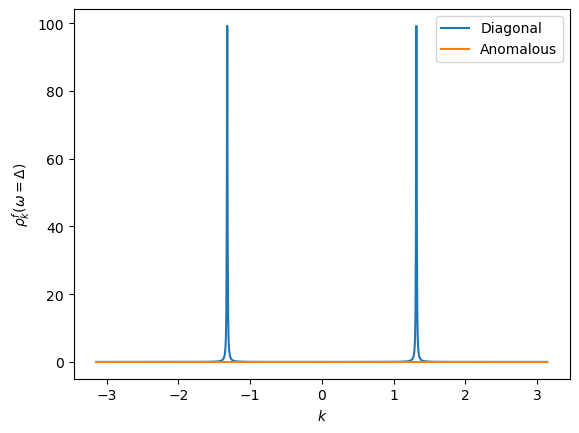

In [3]:
k = np.linspace(-np.pi, np.pi, 1000)
w_0 = 1
Gamma = 0.01
Delta = 0
B_x = 0
B_y = 0
mu = 0
omega = 0.5

rho_k = np.array([Rho_k(k, omega, w_0, Gamma, B_x, B_y, Delta, mu) for k in k], dtype=complex)
fig, ax  = plt.subplots()
ax.plot(k, rho_k[:, 0, 0], label="Diagonal")
#ax.plot(k, rho_k[:, 1, 1])
ax.plot(k, rho_k[:, 0, 2], label="Anomalous")
#ax.plot(k, rho_k[:, 1, 0])

ax.set_xlabel(r"$k$");
ax.set_ylabel(r"$\rho^f_k(\omega=\Delta)$");
ax.legend();

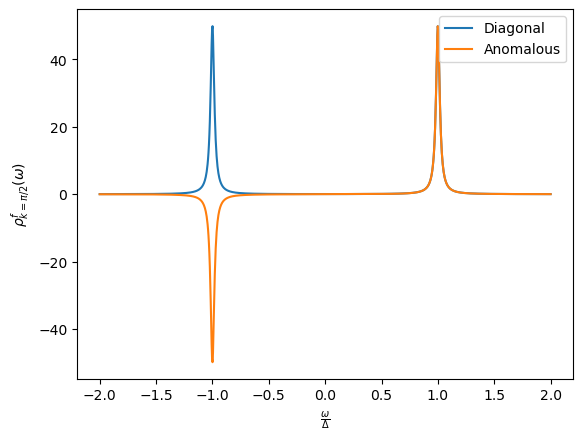

In [58]:
k = np.pi/2
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_x = 0
B_y = 0
mu = 0
omega = np.linspace(-1, 1, 1000)

rho_k = np.array([Rho_k(k, omega, w_0, Gamma, B_x, B_y, Delta, mu) for omega in omega], dtype=complex)
fig, ax  = plt.subplots()
ax.plot(omega/Delta, rho_k[:, 0, 0], label="Diagonal")
ax.plot(omega/Delta, rho_k[:, 0, 2], label="Anomalous")

ax.set_xlabel(r"$\frac{\omega}{\Delta}$");
ax.set_ylabel(r"$\rho^f_{k=\pi/2}(\omega)$");
ax.legend();

## Fermi function derivative $\beta=100$

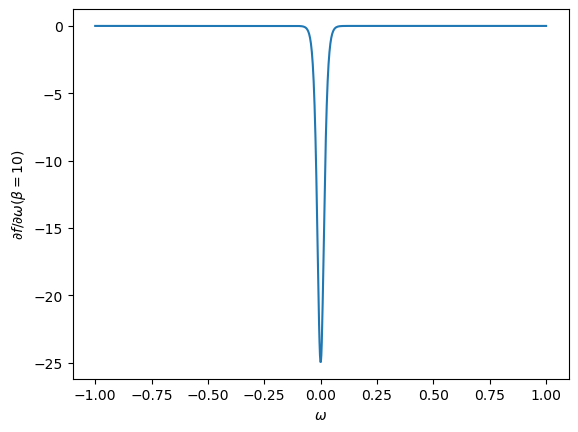

In [4]:
beta = 100
omega = np.linspace(-1, 1, 1000)

F = Fermi_function_derivative(omega, beta)
fig, ax = plt.subplots()
ax.plot(omega, F);
ax.set_ylabel(r"$\partial f/\partial \omega (\beta=10)$");
ax.set_xlabel("$\omega$");

In [7]:
k = np.linspace(-np.pi, np.pi)
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_x = 0
B_y = 0
mu = 0
beta = 10

get_sigma_quad(k, w_0, Gamma, B_x, B_y, Delta, mu, beta)

(31.083480456871488-5.62375002720565e-17j)

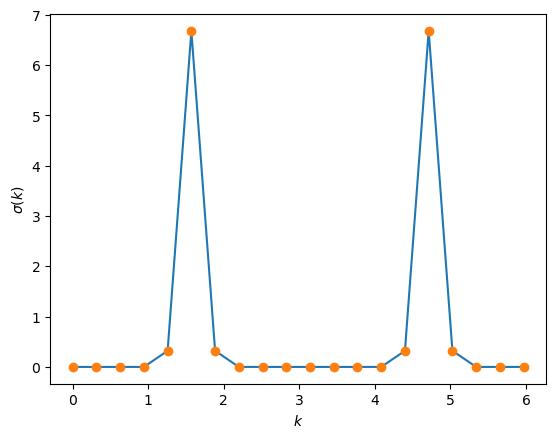

In [43]:
L = 20
k = 2*np.pi/L*np.arange(0, L)
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_x = 0
B_y = 0
mu = 0
beta = 10

sigma_k = [get_sigma_quad(np.array([k]), w_0, Gamma, B_x, B_y, Delta, mu, beta) for k in k]
fig, ax  = plt.subplots()
ax.plot(k, sigma_k)
ax.plot(k, sigma_k, "o")

ax.set_xlabel(r"$k$");
ax.set_ylabel(r"$\sigma(k)$");

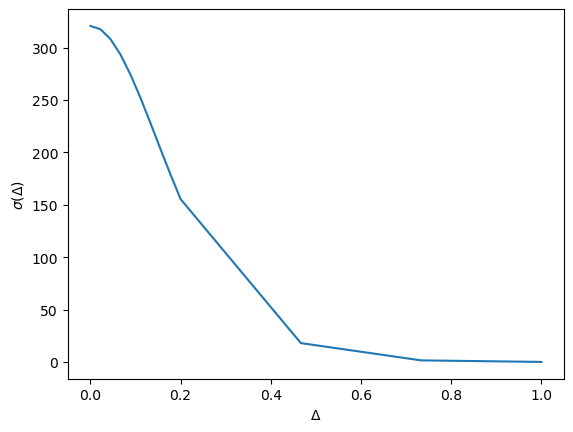

In [8]:
L = 21
k = 2*np.pi/L*np.arange(0, L)
w_0 = 1
Gamma = 0.01
Delta = np.concatenate((np.linspace(0, 0.2, 10), np.linspace(0.2, 1, 4)))
B_x = 0
B_y = 0
mu = 0
beta = 10

sigma_Delta = [get_sigma_quad(k, w_0, Gamma, B_x, B_y, Delta, mu, beta) for Delta in Delta]
fig, ax  = plt.subplots()
ax.plot(Delta, sigma_Delta)

ax.set_xlabel(r"$\Delta$");
ax.set_ylabel(r"$\sigma(\Delta)$");

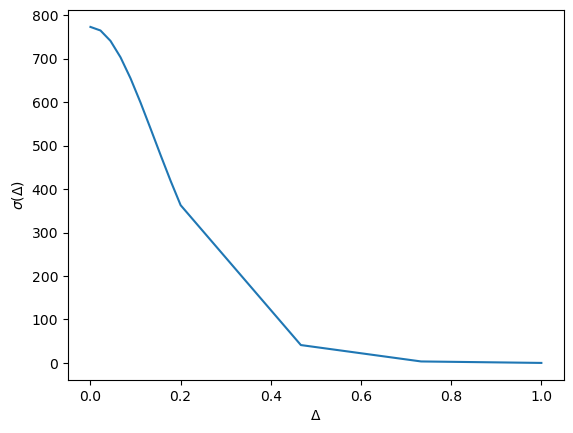

In [49]:
L = 48
k = 2*np.pi/L*np.arange(0, L)
w_0 = 1
Gamma = 0.01
Delta = np.concatenate((np.linspace(0, 0.2, 10), np.linspace(0.2, 1, 4)))
B_x = 0
B_y = 0
mu = 0
beta = 10

sigma_Delta = [get_sigma_quad(k, w_0, Gamma, B_x, B_y, Delta, mu, beta) for Delta in Delta]
fig, ax  = plt.subplots()
ax.plot(Delta, sigma_Delta)

ax.set_xlabel(r"$\Delta$");
ax.set_ylabel(r"$\sigma(\Delta)$");

/home/gabriel/anaconda3/envs/DC-superconductivity/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/gabriel/anaconda3/envs/DC-superconductivity/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


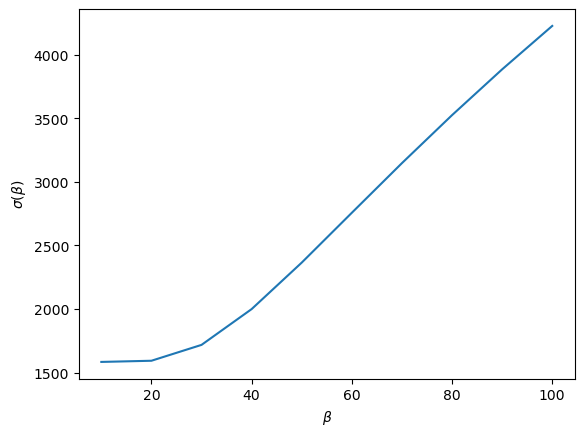

In [2]:
L = 100
k = 2*np.pi/L*np.arange(0, L)
w_0 = 1
Gamma = 0.01
Delta = 0
B_x = 0
B_y = 0
mu = 0
beta = np.linspace(10, 100, 10)
omega = np.linspace(-1, 1, 200)

sigma_Delta = [get_sigma(k, omega, w_0, Gamma, B_x, B_y, Delta, mu, beta) for beta in beta]
fig, ax  = plt.subplots()
ax.plot(beta, sigma_Delta)

ax.set_xlabel(r"$\beta$");
ax.set_ylabel(r"$\sigma(\beta)$");

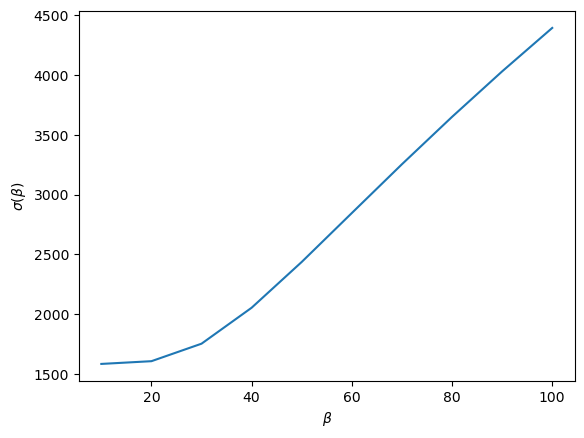

In [16]:
L = 100
k = 2*np.pi/L*np.arange(0, L)
w_0 = 1
Gamma = 0.01
Delta = 0
B_x = 0
B_y = 0
mu = 0
beta = np.linspace(10, 100, 10)
omega = np.linspace(-1, 1, 100)

sigma_Delta = [get_sigma_quad(k, w_0, Gamma, B_x, B_y, Delta, mu, beta) for beta in beta]
fig, ax  = plt.subplots()
ax.plot(beta, sigma_Delta)

ax.set_xlabel(r"$\beta$");
ax.set_ylabel(r"$\sigma(\beta)$");

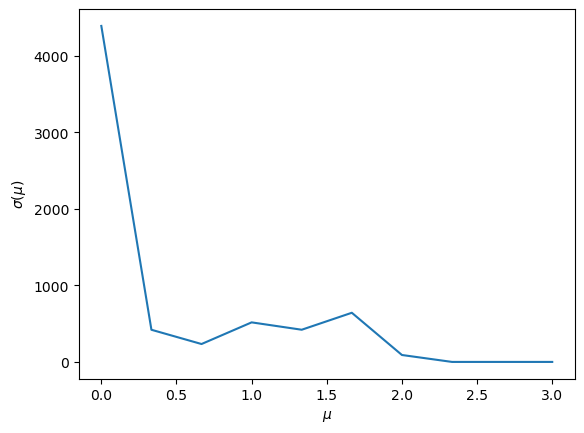

In [3]:
L = 100
k = 2*np.pi/L*np.arange(0, L)
w_0 = 1
Gamma = 0.01
Delta = 0
B_x = 0
B_y = 0
mu = np.linspace(0, 3, 10)
beta = 100
omega = np.linspace(-1, 1, 100)

sigma = [get_sigma_quad(k, w_0, Gamma, B_x, B_y, Delta, mu, beta) for mu in mu]
fig, ax  = plt.subplots()
ax.plot(mu, sigma)

ax.set_xlabel(r"$\mu$");
ax.set_ylabel(r"$\sigma(\mu)$");

/home/gabriel/anaconda3/envs/DC-superconductivity/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/gabriel/anaconda3/envs/DC-superconductivity/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


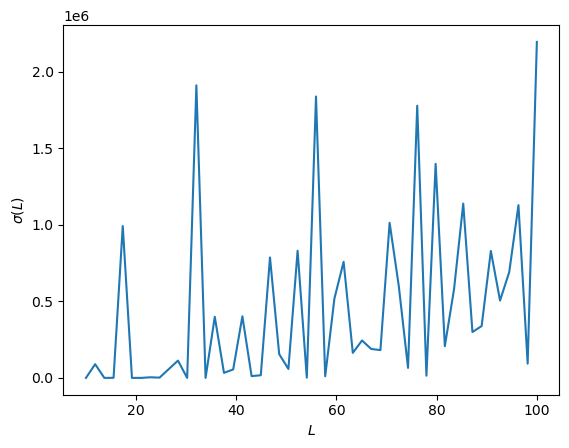

In [3]:
L = np.linspace(10, 100)
w_0 = 1
Gamma = 0.01
Delta = 0
B_x = 0
B_y = 0
mu = 0
beta = 100
omega = np.linspace(-1, 1, 1000)

sigma = [get_sigma(2*np.pi/L*np.arange(0, L), omega, w_0, Gamma, B_x, B_y, Delta, mu, beta) for L in L]
fig, ax  = plt.subplots()
ax.plot(L, sigma)

ax.set_xlabel(r"$L$");
ax.set_ylabel(r"$\sigma(L)$");

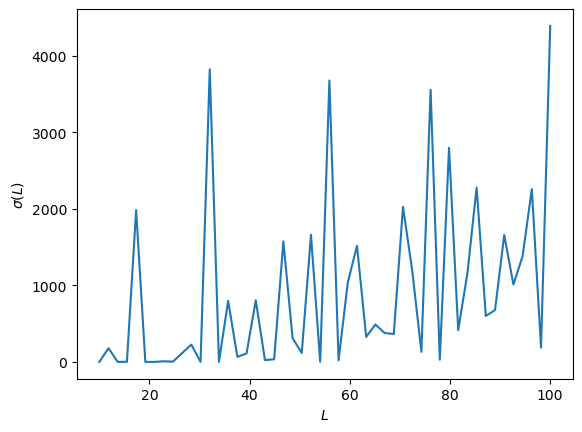

In [7]:
fig, ax  = plt.subplots()
ax.plot(L, sigma)

ax.set_xlabel(r"$L$");
ax.set_ylabel(r"$\sigma(L)$");

In [8]:
sigma

[(0.001604496107695147-1.273354109455505e-22j),
 (179.6996158295064-4.500692638786121e-23j),
 (0.026342798821795736-4.310463378333503e-22j),
 (1.6916416517176105-2.2198763148978546e-22j),
 (1985.6940377702979+1.4672512691222778e-14j),
 (0.2906681474501246-3.74092033303329e-22j),
 (0.35657748226361885-5.947231289872979e-23j),
 (8.302689337920228-1.1274178534888819e-20j),
 (3.7713302669849647-6.924924033871682e-18j),
 (115.5291570553419-9.046381238251179e-22j),
 (226.30273444839884+1.0866351410254513e-22j),
 (0.28013226544357156+9.863294885476546e-23j),
 (3825.22341418989+6.339888042300543e-15j),
 (0.30307852095155385+1.480333362917099e-22j),
 (799.0610459217762+3.034153667196639e-15j),
 (66.19744045086904+4.6612481655099e-17j),
 (110.69035268296858-3.71511133748298e-22j),
 (805.1413714906021+6.3734153835429094e-18j),
 (23.701905020842375-1.4682019165731354e-18j),
 (34.77031724875565-3.252150326115143e-18j),
 (1575.265036715312-1.3005494256092147e-22j),
 (311.34145170107416-8.07801612735